# FA 4

Mathematical Modeling

Samson, Justine Aizel D.

# Michigan state lottery

In [ ]:
import math

# Probability of Winning at Least Once in a Year
def probability_of_winning_once(n_tickets_per_week):
    total_numbers = 999  # Total possible outcomes (000 to 999)
    p_lose_one_ticket = 998 / 999  # Probability of losing with one ticket

    # Probability of losing all tickets in a week
    p_lose_all_week = (p_lose_one_ticket) ** n_tickets_per_week

    # Probability of losing all tickets for 52 weeks
    p_lose_all_year = p_lose_all_week ** 52

    # Probability of winning at least once in a year
    p_win_at_least_once = 1 - p_lose_all_year
    return p_win_at_least_once

# Question 1: Probability of Winning at Least Once
def question_1():
    print("\n1. Probability of Winning at Least Once in a Year")
    p_win = probability_of_winning_once(1)  # Single ticket per week
    print(f"With 1 ticket per week, the probability of winning at least once in a year is: {p_win:.6f}")

# Question 2: Improving Chances by Buying More Tickets
def question_2():
    print("\n2. Improving Chances by Buying More Tickets")
    print(f"{'Tickets/Week':<15} {'Probability of Winning (at least once/year)':<40}")
    print("-" * 55)

    # Fixed range of tickets per week
    for n in range(1, 10):  # Tickets from 1 to 9 per week
        p_win = probability_of_winning_once(n)
        print(f"{n:<15} {p_win:.6f}")

# Question 3: Likely Variation in State Revenue
def state_revenue_analysis(n_tickets_sold):
    ticket_price = 1  # Cost of one ticket
    prize_amount = 500  # Prize for winning
    p_win = 1 / 999  # Probability of winning with one ticket

    # Expected number of winners
    expected_winners = n_tickets_sold * p_win

    # Expected payout
    expected_payout = expected_winners * prize_amount

    # Profit calculation
    revenue = n_tickets_sold * ticket_price
    profit = revenue - expected_payout

    # Standard deviation of winners
    std_dev_winners = math.sqrt(n_tickets_sold * p_win * (1 - p_win))

    # Range of likely variation (95% confidence interval for winners)
    lower_bound_winners = expected_winners - 1.96 * std_dev_winners
    upper_bound_winners = expected_winners + 1.96 * std_dev_winners

    # Range of likely payout
    lower_bound_payout = lower_bound_winners * prize_amount
    upper_bound_payout = upper_bound_winners * prize_amount

    # Profit range
    lower_bound_profit = revenue - upper_bound_payout
    upper_bound_profit = revenue - lower_bound_payout

    return {
        "expected_revenue": revenue,
        "expected_payout": expected_payout,
        "expected_profit": profit,
        "profit_range": (lower_bound_profit, upper_bound_profit),
    }

def question_3():
    print("\n3. Likely Variation in State Revenue")
    n_tickets_sold = 1_000_000  # Number of tickets sold
    analysis = state_revenue_analysis(n_tickets_sold)
    print(f"Expected Revenue: ${analysis['expected_revenue']:.2f}")
    print(f"Expected Payout: ${analysis['expected_payout']:.2f}")
    print(f"Expected Profit: ${analysis['expected_profit']:.2f}")
    print(f"Profit Range (95% CI): ${analysis['profit_range'][0]:.2f} to ${analysis['profit_range'][1]:.2f}")

# Main Execution
if __name__ == "__main__":
    question_1()  # Execute Question 1
    question_2()  # Execute Question 2
    question_3()  # Execute Question 3



1. Probability of Winning at Least Once in a Year
With 1 ticket per week, the probability of winning at least once in a year is: 0.050745

2. Improving Chances by Buying More Tickets
Tickets/Week    Probability of Winning (at least once/year)
-------------------------------------------------------
1               0.050745
2               0.098916
3               0.144641
4               0.188047
5               0.229250
6               0.268361
7               0.305489
8               0.340732
9               0.374187

3. Likely Variation in State Revenue
Expected Revenue: $1000000.00
Expected Payout: $500500.50
Expected Profit: $499499.50
Profit Range (95% CI): $468509.19 to $530489.81


# Supermarket checkout stand

In [ ]:
import math

# Part 1: Explain why P(N >= n) = 1/n
# The probability that your wait time X is the longest among the first n customers (including you)
# is equivalent to saying that X is the maximum value in the set {X, X1, ..., Xn-1}.
# Since X, X1, X2, ... are identically distributed, each has an equal probability of being the maximum.
# Thus, the probability that X is the maximum is 1/n.

def explain_part_1():
    explanation = (
        "P(N >= n) = 1/n because all waiting times {X, X1, X2, ..., Xn-1} are identically distributed.\n"
        "Each customer, including yourself, has an equal chance of waiting the longest out of the first n individuals.\n"
        "Therefore, the probability that your wait time is the longest is uniformly distributed, giving P(N >= n) = 1/n."
    )
    return explanation

# Part 2: Calculate the probability distribution of N
# P(N = k) is the probability that you have to observe exactly k customers before finding one who waited longer than you.
# This is given by P(N = k) = (1 / k) - (1 / (k + 1)), which is derived from the relationship P(N >= n).

def probability_distribution(max_n):
    distribution = {}
    for k in range(1, max_n + 1):
        p_k = (1 / k) - (1 / (k + 1))
        distribution[k] = p_k
    return distribution

# Part 3: Calculate the expected value E[N]
# E[N] is the sum of k * P(N = k) for all k. Using the formula for P(N = k), we find:
# E[N] = sum_{k=1}^infinity [1 / k]. This is the harmonic number H_n, which grows logarithmically.

def expected_value(max_n):
    e_n = 0
    for k in range(1, max_n + 1):
        p_k = (1 / k) - (1 / (k + 1))
        e_n += k * p_k
    return e_n

# Main Execution
if __name__ == "__main__":
    # Part 1
    print("Part 1: Explanation")
    print(explain_part_1())

    # Part 2
    print("\nPart 2: Probability Distribution of N")
    max_n = 10  # Calculate for the first 10 values of N
    distribution = probability_distribution(max_n)
    for k, p_k in distribution.items():
        print(f"P(N = {k}) = {p_k:.6f}")

    # Part 3
    print("\nPart 3: Expected Value of N")
    e_n = expected_value(max_n)
    print(f"E[N] (for the first {max_n} values) = {e_n:.6f}")


Part 1: Explanation
P(N >= n) = 1/n because all waiting times {X, X1, X2, ..., Xn-1} are identically distributed.
Each customer, including yourself, has an equal chance of waiting the longest out of the first n individuals.
Therefore, the probability that your wait time is the longest is uniformly distributed, giving P(N >= n) = 1/n.

Part 2: Probability Distribution of N
P(N = 1) = 0.500000
P(N = 2) = 0.166667
P(N = 3) = 0.083333
P(N = 4) = 0.050000
P(N = 5) = 0.033333
P(N = 6) = 0.023810
P(N = 7) = 0.017857
P(N = 8) = 0.013889
P(N = 9) = 0.011111
P(N = 10) = 0.009091

Part 3: Expected Value of N
E[N] (for the first 10 values) = 2.019877


# Chemical spill

In [ ]:
import numpy as np

# Functions
def time_to_reach_well(distance, velocity):
    """Calculate the time for the contaminant to reach the municipal well."""
    return distance / velocity

def time_to_safe_concentration(initial_concentration, safe_level, velocity, initial_distance):
    """Calculate the time for the concentration to drop below the safe level."""
    time_to_safe = 0
    while initial_concentration * (initial_distance / (initial_distance + velocity * time_to_safe))**2 > safe_level:
        time_to_safe += 1
    return time_to_safe

def sensitivity_velocity(velocity_range, initial_concentration, safe_concentration, initial_distance):
    """Compute the sensitivity of safe concentration time to changes in velocity."""
    time_for_safe_concentration = []
    for velocity in velocity_range:
        time_to_safe = time_to_safe_concentration(initial_concentration, safe_concentration, velocity, initial_distance)
        time_for_safe_concentration.append(time_to_safe)
    return time_for_safe_concentration

def sensitivity_plume_width(width_range, initial_concentration, safe_concentration, velocity, initial_distance):
    """Compute the sensitivity of safe concentration time to changes in plume width."""
    time_for_safe_concentration = []
    for width in width_range:
        # Adjust concentration calculation for plume width, if needed
        time_to_safe = time_to_safe_concentration(initial_concentration, safe_concentration, velocity, initial_distance)
        time_for_safe_concentration.append(time_to_safe)
    return time_for_safe_concentration

# Parameters
initial_concentration = 3.6  # ppm
safe_concentration = 0.001  # ppm
velocity = 0.5  # m/s
initial_distance = 500  # meters from spill to start of plume
plume_width = 200  # meters

# 1. Time to reach the well
distance_to_well = 1800 - initial_distance  # 1800m - initial_distance
time_to_well = time_to_reach_well(distance_to_well, velocity)
print("Answer 1: Time for the maximum concentration to reach the municipal well:")
print(f"{time_to_well:.2f} seconds\n")

# 2. Time for concentration to drop below safe level
time_to_safe = time_to_safe_concentration(initial_concentration, safe_concentration, velocity, initial_distance)
print("Answer 2: Time for concentration at the well to fall below the safe level:")
print(f"{time_to_safe} seconds\n")

# 3. Sensitivity to velocity
velocity_range = np.linspace(0.1, 2.0, 10)  # Range of velocities
time_for_safe_concentration_velocity = sensitivity_velocity(velocity_range, initial_concentration, safe_concentration, initial_distance)
print("Answer 3: Sensitivity to velocity (time to reach safe concentration):")
for v, t in zip(velocity_range, time_for_safe_concentration_velocity):
    print(f"Velocity = {v:.2f} m/s, Time to safe concentration = {t} seconds")
print()

# 4. Sensitivity to plume width
width_range = np.linspace(100, 300, 5)  # Range of plume widths
time_for_safe_concentration_width = sensitivity_plume_width(width_range, initial_concentration, safe_concentration, velocity, initial_distance)
print("Answer 4: Sensitivity to plume width (time to reach safe concentration):")
for w, t in zip(width_range, time_for_safe_concentration_width):
    print(f"Plume width = {w:.2f} meters, Time to safe concentration = {t} seconds")


Answer 1: Time for the maximum concentration to reach the municipal well:
2600.00 seconds

Answer 2: Time for concentration at the well to fall below the safe level:
59000 seconds

Answer 3: Sensitivity to velocity (time to reach safe concentration):
Velocity = 0.10 m/s, Time to safe concentration = 295000 seconds
Velocity = 0.31 m/s, Time to safe concentration = 94822 seconds
Velocity = 0.52 m/s, Time to safe concentration = 56490 seconds
Velocity = 0.73 m/s, Time to safe concentration = 40228 seconds
Velocity = 0.94 m/s, Time to safe concentration = 31236 seconds
Velocity = 1.16 m/s, Time to safe concentration = 25529 seconds
Velocity = 1.37 m/s, Time to safe concentration = 21586 seconds
Velocity = 1.58 m/s, Time to safe concentration = 18698 seconds
Velocity = 1.79 m/s, Time to safe concentration = 16491 seconds
Velocity = 2.00 m/s, Time to safe concentration = 14750 seconds

Answer 4: Sensitivity to plume width (time to reach safe concentration):
Plume width = 100.00 meters, Time 

#  Markov chain model of floods

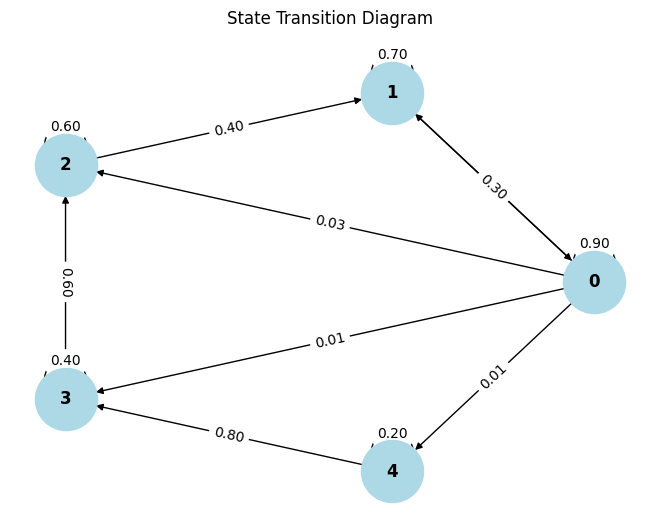


Part 2: Steady-state probability distribution:
[0.66115702 0.22038567 0.08264463 0.02754821 0.00826446]


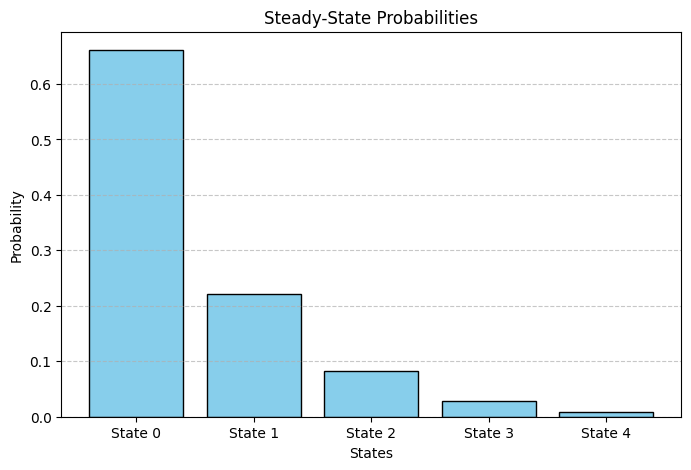


Part 3: Probability of severe floods (state 4):
0.0083
Expected Daily Contribution (acre-feet): -57.85
Expected Annual Contribution (acre-feet): -21115.70
The reservoir releases more water than it stores annually.

Part 4: Expected annual number of acre-feet of water stored in the reservoir:
-30.30 acre-feet
The reservoir has a negative storage balance, indicating net release of water.


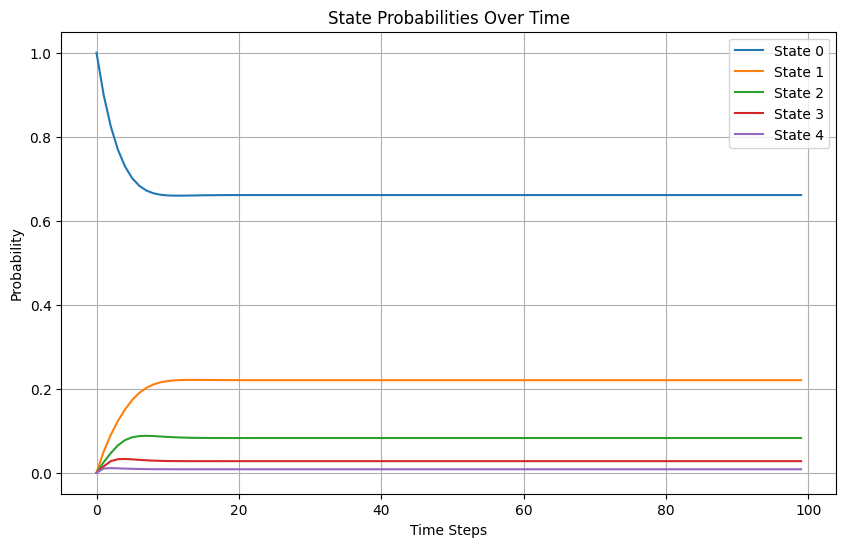

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# State transition probability matrix
P = np.array([
    [0.9, 0.05, 0.025, 0.015, 0.01],
    [0.3, 0.7, 0, 0, 0],
    [0, 0.4, 0.6, 0, 0],
    [0, 0, 0.6, 0.4, 0],
    [0, 0, 0, 0.8, 0.2]
])

# 1. Draw the state transition probability diagram
def draw_transition_diagram(P):
    import networkx as nx

    G = nx.DiGraph()
    states = range(P.shape[0])

    for i in states:
        for j in states:
            if P[i, j] > 0:
                G.add_edge(i, j, weight=P[i, j])

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in labels.items()})
    plt.title("State Transition Diagram")
    plt.show()

# Call function for part 1
draw_transition_diagram(P)

# 2. Find the steady-state probability distribution
def find_steady_state(P):
    n = P.shape[0]
    A = np.vstack([P.T - np.eye(n), np.ones(n)])
    b = np.append(np.zeros(n), 1)
    steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
    return steady_state

# Call function for part 2
steady_state = find_steady_state(P)
print("\nPart 2: Steady-state probability distribution:")
print(steady_state)

# Plot the steady-state probabilities
def plot_steady_state(steady_state):
    plt.figure(figsize=(8, 5))
    states = range(len(steady_state))
    plt.bar(states, steady_state, color='skyblue', edgecolor='black')
    plt.title("Steady-State Probabilities")
    plt.xlabel("States")
    plt.ylabel("Probability")
    plt.xticks(states, [f"State {i}" for i in states])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_steady_state(steady_state)

# 3. How often are severe floods (state 4)?
def severe_flood_analysis(steady_state, days_in_year=365):
    severe_flood_probability = steady_state[4]
    expected_daily_contribution = severe_flood_probability * 1000 - steady_state[0] * 100
    expected_annual_contribution = expected_daily_contribution * days_in_year
    return severe_flood_probability, expected_daily_contribution, expected_annual_contribution

# Call function for part 3
severe_flood_probability, expected_daily_contribution, expected_annual_contribution = severe_flood_analysis(steady_state)
print("\nPart 3: Probability of severe floods (state 4):")
print(f"{severe_flood_probability:.4f}")
print(f"Expected Daily Contribution (acre-feet): {expected_daily_contribution:.2f}")
print(f"Expected Annual Contribution (acre-feet): {expected_annual_contribution:.2f}")
if expected_annual_contribution > 0:
    print("The reservoir stores more water than it releases annually.")
else:
    print("The reservoir releases more water than it stores annually.")

# 4. Expected annual water stored in the reservoir
def expected_annual_storage(steady_state, storage_policy):
    expected_storage = np.dot(steady_state, storage_policy)
    return expected_storage

# Define storage policy: +1000 acre-feet/day for flows > 5000 cfs (states 3 and 4),
#                        -100 acre-feet/day for flows < 1000 cfs (state 0),
#                         0 for other states (1 and 2)
storage_policy = np.array([-100, 0, 0, 1000, 1000])

# Call function for part 4
annual_storage = expected_annual_storage(steady_state, storage_policy)
print("\nPart 4: Expected annual number of acre-feet of water stored in the reservoir:")
print(f"{annual_storage:.2f} acre-feet")

if annual_storage > 0:
    print("The reservoir has a positive storage balance, indicating net accumulation of water.")
else:
    print("The reservoir has a negative storage balance, indicating net release of water.")

# Additional graph: State probabilities over time
def simulate_markov_chain(P, initial_state, steps=100):
    state_probabilities = np.zeros((steps, P.shape[0]))
    state_probabilities[0, initial_state] = 1

    for t in range(1, steps):
        state_probabilities[t] = np.dot(state_probabilities[t-1], P)

    return state_probabilities

def plot_state_probabilities(state_probabilities):
    plt.figure(figsize=(10, 6))
    for i in range(state_probabilities.shape[1]):
        plt.plot(state_probabilities[:, i], label=f'State {i}')

    plt.title("State Probabilities Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulate and plot
initial_state = 0
state_probabilities = simulate_markov_chain(P, initial_state, steps=100)
plot_state_probabilities(state_probabilities)
